<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br /><b>Peter Br&ouml;cker</b></td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Vorlesung &mdash; Programmiertechniken 11 / Part I
</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2019</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2019-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2019-CompPhys.shtml)

# Part I &mdash; Neuronales Netz mit "back propagation"

In [1]:
using PyCall
cm = pyimport("matplotlib.cm")
using PyPlot
using LaTeXStrings

### Input erzeugen
Der Input sind Arrays, die Zahlen kodieren und für die Optimierung zu einer Matrix verbunden werden:

In [2]:
zero = [1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1];
one = [0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0];

input_data = hcat(zero, one)';
target_data = [0; 1]

2-element Array{Int64,1}:
 0
 1

### Visualisierung

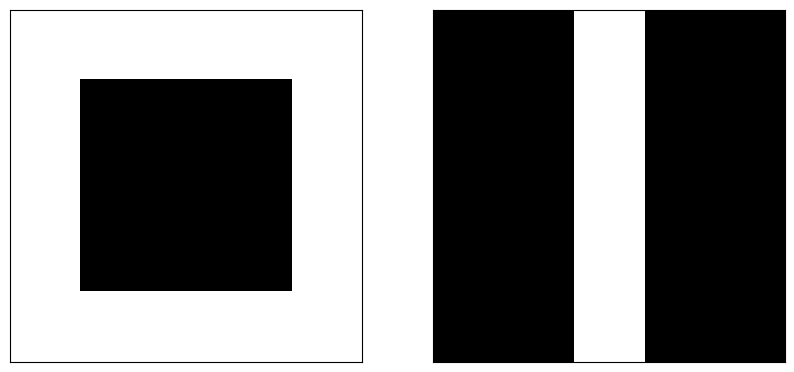

In [3]:
figure(figsize=(10, 5))
subplot(121)
imshow(transpose(reshape(zero, 5, 5)), interpolation="none", cmap="gist_gray")
gca().xaxis.set_visible(false)
gca().yaxis.set_visible(false)
subplot(122)
imshow(transpose(reshape(one, 5, 5)), interpolation="none", cmap="gist_gray")
gca().xaxis.set_visible(false)
gca().yaxis.set_visible(false)


### Aktivierungsfunktion

Als Aktivierungsfunktion der Neuronen dient ein Sigmoid, beschrieben durch die Gleichung

\begin{equation}
\sigma(z) = \dfrac{1}{1 + e^{-z}},
\end{equation}

wobei in unserem Fall $z$ das Skalarprodukt $z = \vec{x} \cdot \vec{w}$ von Inputvektoren $\vec{x}$ und Kantengewichten $\vec{w}$ ist.

In [4]:
sigmoid(z) = 1. / (1. + exp(-z))
s_prime(z) = sigmoid(z) * (1. - sigmoid(z));

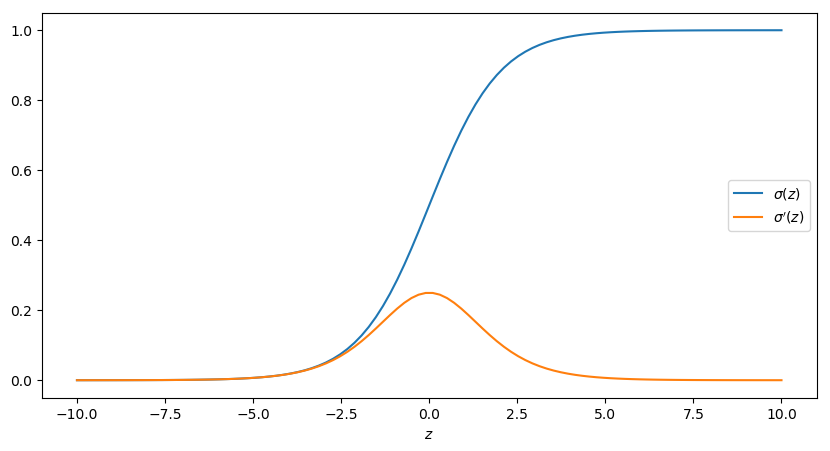

In [5]:
figure(figsize=(10, 5))
xs = range(-10, stop=10, length=100)
plot(xs, sigmoid.(xs), label=L"$\sigma(z)$")
plot(xs, s_prime.(xs), label=L"$\sigma^\prime(z)$")
legend(loc="center right")
ylim([-0.05, 1.05])
xlabel(L"$z$");

Ein neuronales Netz bestehend nur aus der Inputebene und der Outputebene, die verbunden sind über Gewichte $w_{i, j}$, die in einer Matrix $W$ gespeichert sind. Für unseren Fall genügt ein Outputneuron $o$, daher hat die Matrix die Dimension $(25, 1)$. Die Optimierung wird über *backpropagation* unter Verwendung einer **quadratischen Kostenfunktion** $C$ durchgeführt, welche die Abweichung des Outputneurons $o$ vom tatsächlichen Wert $t$ misst:

\begin{equation}
C = \frac{1}{2}(t - o)^2
\end{equation}

Ausgehend von den aktuellen Gewichten wird die Ableitung dieser Kostenfunktion in Richtung der Gewichte berechnet:

\begin{equation}
\dfrac{\partial C}{\partial w_{ij}} = \dfrac{\partial C}{\partial o} \cdot\dfrac{\partial o}{\partial z}\cdot\dfrac{\partial z}{\partial w_{ij}}
\end{equation}

Der Reihe nach ergeben sich also die Terme
- Wie verändert sich der Fehler, wenn sich der Output des Neurons ändert?
- Wie ändert sich der Output, wenn sich das Skalarprodukt $z$ ändert?
- Wie ändert sich das Skalarprodukt $z = \vec{x} \cdot \vec{w}$, wenn sich das Gewicht ändert?

Am Schluss verändern wir die Gewichte genau in die Richtung, die durch den Gradienten vorgegeben wird, gewichtet mit einem Faktor $\gamma$:

\begin{equation}
\tilde{w}_{ij} = w_{i, j} - \gamma * \dfrac{\partial C}{\partial w_{ij}}
\end{equation}

**Initialisiere Gewichte**

In [6]:
n_input = 25
n_output = 1
O = 2 * (rand(n_input, n_output) .- 0.5);
println("Startpunkt\n", round.(sigmoid.(input_data * O), digits=3))

Startpunkt
[0.984; 0.598]


**Lernen**

In [7]:
iterations = 100
gamma = 0.1

for i in 1:iterations
    # Berechne aktuelles Resultat
    result = sigmoid.(input_data * O)
    # Die Abweichung (entspricht erster partiellen Ableitung)
    err = target_data - result
    
    # Ableitung der Sigmoiden (entspricht zweiter partiellen Ableitung)
    derivative = s_prime.(result)
   
    # Update durch Matrixprodukt (entspricht dritter partieller Ableitung und Update)
    O += gamma * input_data' * (err .* derivative)
end

In [8]:
println("Resultat\n", round.(sigmoid.(input_data * O), digits=3))

Resultat
[0.041; 0.88]


## Hidden layers

Das Einfügen von versteckten Ebenen oder *hidden layers* kann dabei helfen Korrelationen aufzudecken, die sonst verborgen blieben. Dazu wird einfach eine weitere Ebene von Neuronen zwischen Input und Output eingefügt und jedes Neuron aus dieser Ebene mit jeweils jedem Neuron der davor und dahinter liegenden Ebene verbunden. Die Optimierung geschieht ausgehend von der Outputebene und nach genau dem gleichen Prinzip wie zuvor.

In [9]:
n_input = 25
n_hidden = 10
n_output = 1

# Matrix des hidden layers
H = 2 * (rand(n_input, n_hidden) .- 0.5);

# Matrix des output layers
O = 2 * (rand(n_hidden, n_output) .- 0.5);

println("Startpunkt\n", round.(sigmoid.(sigmoid.(input_data * H) * O), digits=3))

Startpunkt
[0.812; 0.891]


In [10]:
iterations = 1000
gamma = 0.1

for i in 1:iterations
    # Output der layer
    hidden = sigmoid.(input_data * H)
    result = sigmoid.(hidden * O)
        
    # Die Abweichung (entspricht erster partiellen Ableitung)
    result_err   = target_data .- result
    result_delta = result_err .* s_prime.(result)
    
    # Propagiere diesen Fehler durch den hidden layer
    hidden_err   = result_delta * O'
    hidden_delta = hidden_err .* s_prime.(hidden)
        
    # Update durch Matrixprodukt (entspricht dritter partieller Ableitung und Update)
    O .+= gamma .* (hidden' * result_delta)
    H .+= gamma .* (input_data' * hidden_delta)
end

In [11]:
println("Resultat\n", round.(sigmoid.(sigmoid.(input_data * H) * O), digits=3))

Resultat
[0.016; 0.981]


## Einfluss der Lernrate $\gamma$

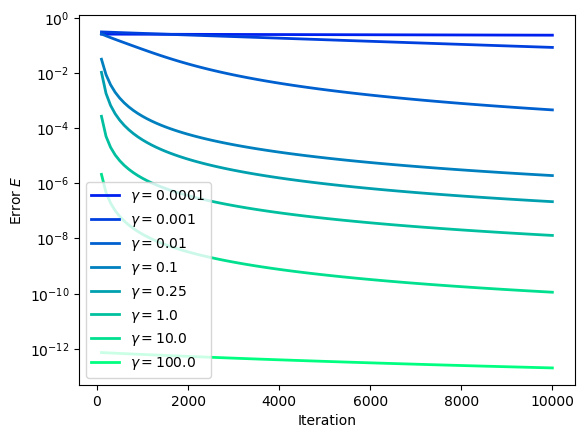

┌ Warning: pyeval is deprecated.  Use py"cmap(g)" instead.  Use $ interpolation to substitute Julia variables and expressions into Python.
│   caller = ip:0x0
└ @ Core :-1


In [12]:
iterations = 10000
cmap = cm.get_cmap("winter")

gammas = [0.0001, 0.001, 0.01, 0.1, 0.25, 1.0, 10.0, 100.0]

for (g, gamma) in enumerate(gammas)
    
    n_input  = 25
    n_hidden = 10
    n_output = 1

    H = 2 * (rand(n_input, n_hidden)  .- 0.5);
    O = 2 * (rand(n_hidden, n_output) .- 0.5);

    errors   = []
    x_values = []
    for i in 1:iterations
        hidden = sigmoid.(input_data * H)
        result = sigmoid.(hidden * O)
        
        result_err = target_data .- result
        
        if mod(i, 100) == 0
            push!(errors, sum(0.5 .* result_err.^2))
            push!(x_values, i)
        end
        result_delta = result_err .* s_prime.(result)

        hidden_err   = result_delta * O'
        hidden_delta = hidden_err .* s_prime.(hidden)

        O .+= gamma .* (hidden' * result_delta)
        H .+= gamma .* (input_data' * hidden_delta)
    end
    
    plot(x_values, errors, linewidth=2, label=L"$\gamma="*string(gamma)*L"$", color=pyeval("cmap(g)", cmap=cmap, g=g/length(gammas)))
end
gca().set_yscale("log")
legend(loc="lower left")
xlabel("Iteration")
ylabel(L"Error $E$");